<a href="https://colab.research.google.com/github/Sanjayvaradha/Projects/blob/main/Mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow.keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import sys as _sys
from tensorflow.python.keras.utils.np_utils import to_categorical
import random

In [ ]:
np.random.seed(0)

In [ ]:
(X_train,y_train),(X_test,y_test)= mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
print(X_train.shape)
print(y_train.shape[0])
print(X_test.shape)

(60000, 28, 28)
60000
(10000, 28, 28)


In [ ]:
assert(X_train.shape[0]==y_train.shape[0]), "The number of images is not eqaul to number of labels"
assert(X_test.shape[0]==y_test.shape[0]), "The number of images is not eqaul to number of labels"
assert(X_train.shape[1:]==(28,28)), "The number of images are not 28*28"
assert(X_test.shape[1:]==(28,28)), "The number of images are not 28*28"


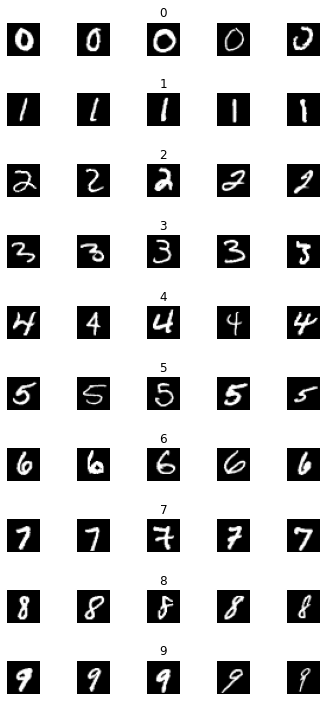

In [ ]:
num_of_samp = []
cols= 5
num_of_classes = 10
fig,axs = plt.subplots(nrows=num_of_classes,ncols=cols,figsize=(5,10))
fig.tight_layout() # worksout on issues with overlapping on plots
for i in range(cols):
  for j in range(num_of_classes):
    x_sel = X_train[y_train==j]
    axs[j][i].imshow(x_sel[random.randint(0,len(x_sel-1)),:,:],cmap=plt.get_cmap('gray'))
    axs[j][i].axis('off')
    if i==2:
      axs[j][i].set_title(str(j))
      num_of_samp.append(len(x_sel))


[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]


Text(0, 0.5, 'num of images')

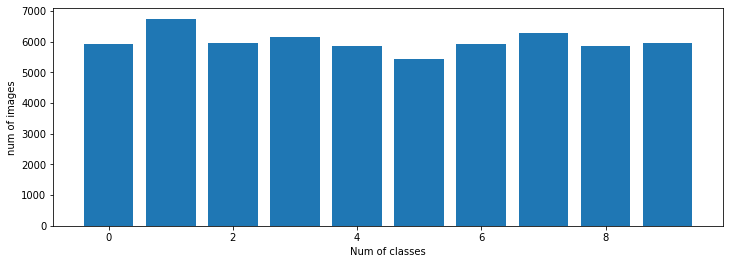

In [ ]:
print(num_of_samp)
plt.figure(figsize=(12,4))
plt.bar(range(0,num_of_classes),num_of_samp)
plt.xlabel('Num of classes')
plt.ylabel('num of images')

In [ ]:
y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)

In [ ]:
X_train = X_train/255  # to decrease the variance between the max pixel to mini pixel
X_test = X_test/255
num_pixels = 784
X_train = X_train.reshape(X_train.shape[0],num_pixels)
X_test = X_test.reshape(X_test.shape[0],num_pixels)

In [ ]:
print(X_test.shape)

(10000, 784)


In [ ]:
def create_model():
  model = Sequential()
  model.add(Dense(10,input_dim=num_pixels,activation='relu'))
  model.add(Dense(30,activation='relu'))
  model.add(Dense(10,activation='relu'))
  model.add(Dense(num_of_classes,activation='softmax'))
  model.compile(Adam(lr=0.01),loss='categorical_crossentropy',metrics=['accuracy'])
  return model

In [ ]:
model = create_model()
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                7850      
_________________________________________________________________
dense_1 (Dense)              (None, 30)                330       
_________________________________________________________________
dense_2 (Dense)              (None, 10)                310       
_________________________________________________________________
dense_3 (Dense)              (None, 10)                110       
Total params: 8,600
Trainable params: 8,600
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
history = model.fit(X_train,y_train,validation_split=0.1,epochs=10,batch_size=200,verbose=1,shuffle=1)

Epoch 1/10
270/270 [==============================] - 2s 5ms/step - loss: 0.8395 - accuracy: 0.7320 - val_loss: 0.2363 - val_accuracy: 0.9322
Epoch 2/10
270/270 [==============================] - 1s 3ms/step - loss: 0.2654 - accuracy: 0.9220 - val_loss: 0.2021 - val_accuracy: 0.9422
Epoch 3/10
270/270 [==============================] - 1s 3ms/step - loss: 0.2384 - accuracy: 0.9315 - val_loss: 0.1831 - val_accuracy: 0.9440
Epoch 4/10
270/270 [==============================] - 1s 3ms/step - loss: 0.2215 - accuracy: 0.9353 - val_loss: 0.1932 - val_accuracy: 0.9420
Epoch 5/10
270/270 [==============================] - 1s 3ms/step - loss: 0.2035 - accuracy: 0.9389 - val_loss: 0.1747 - val_accuracy: 0.9523
Epoch 6/10
270/270 [==============================] - 1s 3ms/step - loss: 0.1916 - accuracy: 0.9426 - val_loss: 0.1783 - val_accuracy: 0.9477
Epoch 7/10
270/270 [==============================] - 1s 3ms/step - loss: 0.1848 - accuracy: 0.9438 - val_loss: 0.1815 - val_accuracy: 0.9483
Epoch 

Text(0.5, 0, 'epoch')

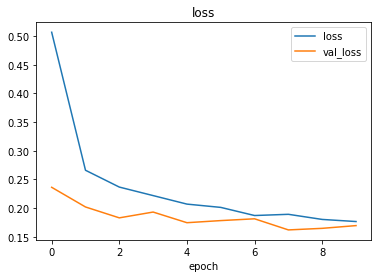

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss','val_loss'])
plt.title('loss')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

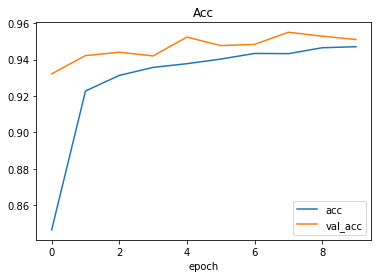

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['acc','val_acc'])
plt.title('Acc')
plt.xlabel('epoch')

In [ ]:
score = model.evaluate(X_test,y_test,verbose=0)
print('Testscore',score[0])
print('Testacc',score[1])

Testscore 0.21930967271327972
Testacc 0.9383000135421753


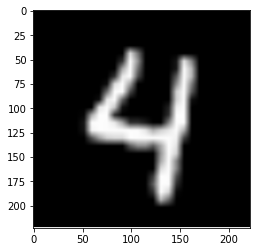

In [ ]:
import requests
from PIL import Image
#url = 'https://www.researchgate.net/profile/Jose_Sempere/publication/221258631/figure/fig1/AS:305526891139075@1449854695342/Handwritten-digit-2.png'
url = 'https://user-images.githubusercontent.com/379372/31909713-d9046856-b7ef-11e7-98fe-8a1e133c0010.png'

response = requests.get(url,stream=True)
img = Image.open(response.raw)
plt.imshow(img ,cmap=plt.get_cmap('gray'))

(28, 28)


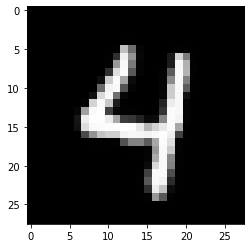

In [ ]:
import cv2
img_array = np.asarray(img) #to convert the png img into array Reason to resize the img into 28x28
resized = cv2.resize(img_array,(28,28))
gray_scale= cv2.cvtColor(resized,cv2.COLOR_BGR2GRAY)
print(gray_scale.shape)
final_img= cv2.bitwise_not(gray_scale)
#plt.imshow(final_img,cmap=plt.get_cmap('gray'))
plt.imshow(gray_scale,cmap=plt.get_cmap('gray'))

In [ ]:
final_img= final_img/255
final_img=final_img.reshape(1,num_pixels)
gray_scale= gray_scale/255
gray_scale=gray_scale.reshape(1,num_pixels)

In [ ]:
prediction = model.predict_classes(final_img)
print("Prediction num",str(prediction))

Prediction num [5]


/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
